In [1]:
import numpy as np

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from Linear import *
from MSELoss import *
from Tanh import Tanh
from Sigmoide import Sigmoide

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


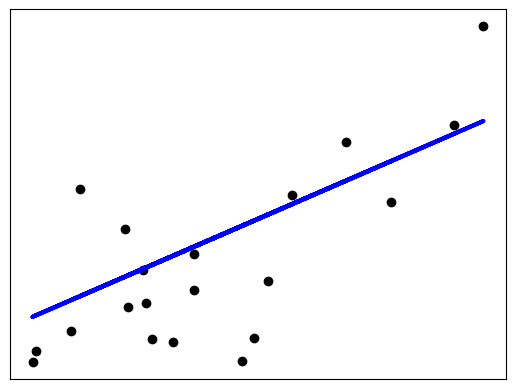

In [18]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Tests couche linéaire

In [6]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Données de forme (442 exemples, 10 dimensions)
# On récupère une seule dimensions (la N°3), newaxis est fait pour qu'on ait pas un vecteur mais une matrice 442*1
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

dim_input = diabetes_X_train.shape[1]
dim_output = 1 #diabetes_y_train.shape[]


### Passe forward

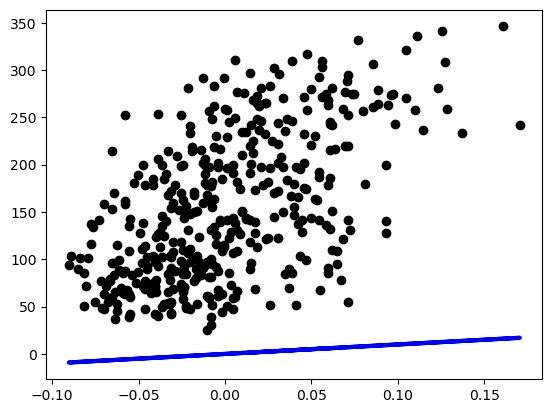

In [19]:
diabetes_y_train = diabetes_y_train.reshape(-1,1)
couche_lineaire = Linear(diabetes_X_train.shape[1], diabetes_y_train.shape[1])
output = couche_lineaire.forward(diabetes_X_train)


plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output, color="blue", linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

### Calculer le cout

In [20]:
mseloss = MSELoss()

cout = mseloss.forward(diabetes_y_train, output)
gradient_loss = mseloss.backward(diabetes_y_train, output) # le premier delta du backward
#print(gradient_loss)
print(f"{cout=}")


cout=array([29051.83377091])


### Mise à jour des parametres

In [21]:
couche_lineaire.backward_update_gradient(diabetes_X_train, delta=gradient_loss)
print(couche_lineaire._gradient)

[[-1663.37367075]]


In [22]:
couche_lineaire.backward_delta(diabetes_X_train , delta=gradient_loss)

array([[-28966.07586963],
       [-16029.48122478],
       [-27310.97573327],
       [-41431.9002901 ],
       [-27727.69384409],
       [-20213.91881   ],
       [-28543.25625887],
       [-12637.89411681],
       [-20766.07586963],
       [-61218.75694066],
       [-21876.1684691 ],
       [-13449.88177021],
       [-36376.80015375],
       [-37037.89411681],
       [-24112.13142931],
       [-34561.23773897],
       [-32354.08821622],
       [-28557.6629776 ],
       [-19610.34404863],
       [-33961.23773897],
       [-14737.26243216],
       [-10247.46270488],
       [-13681.00659976],
       [-47787.6321111 ],
       [-36083.42566509],
       [-40653.45653158],
       [-28946.83102024],
       [-15809.18835258],
       [-26625.9064634 ],
       [-56724.11908272],
       [-24910.97573327],
       [-13109.71236399],
       [-65694.25762245],
       [-18407.9249833 ],
       [-14266.59988103],
       [-21019.9126367 ],
       [-52542.10056282],
       [-54979.21921907],
       [-489

In [24]:
couche_lineaire.update_parameters(gradient_step=1e-3)

In [25]:
couche_lineaire._parameters

array([[101.66337367]])

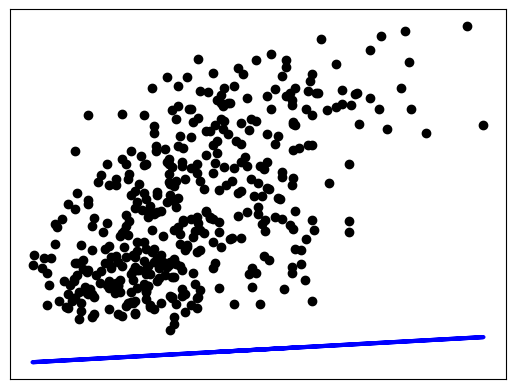

In [26]:
output2 = couche_lineaire.forward(diabetes_X_train)

# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output2, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Nouveau cout

In [28]:
cout = mseloss.forward(diabetes_y_train, output2)
print(f'{cout=}')

cout=array([29045.28361093])


In [29]:
# Création d'un tableau de données exemple
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Division en groupes de tailles égales
groupes = np.array_split(data, 3)  # Divise en 3 groupes de tailles égales

# Affichage des groupes
for groupe in groupes:
    print(groupe)


[1 2 3 4]
[5 6 7]
[ 8  9 10]


In [30]:
# Création d'un tableau de données exemple
data = np.array(range(23))

# Taille de chaque groupe
taille_groupe = 4

# Nombre total de groupes
nombre_groupes = len(data) // taille_groupe + (1 if len(data) % taille_groupe != 0 else 0)

# Division en groupes selon la division euclidienne
groupes = np.array_split(data, nombre_groupes)

# Affichage des groupes
for groupe in groupes:
    print(groupe)


[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
[12 13 14 15]
[16 17 18 19]
[20 21 22]


## Tests Non-linéaire

### Chargement et normalisation des données

In [4]:
# Load the cancer dataset
cancer_X, cancer_y = datasets.load_breast_cancer(return_X_y=True)

# Données de forme (442 exemples, 10 dimensions)
# On récupère une seule dimensions (la N°3), newaxis est fait pour qu'on ait pas un vecteur mais une matrice 442*1
cancer_X = cancer_X[:, :2]

# Split the data into training/testing sets
cancer_X_train = cancer_X[:-20]
cancer_X_test = cancer_X[-20:]

# Split the targets into training/testing sets
cancer_y_train = cancer_y[:-20]
cancer_y_test = cancer_y[-20:]

dim_input = cancer_X_train.shape[1]
dim_output = 1 # le score de chaque exemple, qui va passer par la sigmoide finale
dim_output1 = dim_input #==2


In [5]:
scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train)

### Réseau à 2 couches linéaires avec une activation tangente entre les deux couches et une activation sigmoïde à la sortie.

In [45]:
couche_lineaire_1 = Linear(dim_input, dim_output1)
act_tanh = Tanh()
couche_lineaire_2 = Linear(dim_input, dim_output)
act_sig = Sigmoide()
mse_loss = MSELoss()

### Passe forward

In [46]:
output_1 = couche_lineaire_1.forward(cancer_X_train)
act_1 = act_tanh.forward(output_1)
output_2 = couche_lineaire_2.forward(act_1)
act_2 = act_sig.forward(output_2)

In [47]:
cout = mse_loss.forward(cancer_y_train, act_2)
cout

array([0.86024221])

### Pass backward

In [48]:
delta_1 = mse_loss.backward(cancer_y_train, act_2)
delta_2 = act_sig.backward_delta(output_2, delta_1)
delta_3 = couche_lineaire_2.backward_delta(act_1, delta_2)
couche_lineaire_2.backward_update_gradient(act_1, delta_2)

delta_4 = act_tanh.backward_delta(output_1, delta_3)

delta_5 = couche_lineaire_1.backward_delta(cancer_X_train, delta_4)
couche_lineaire_1.backward_update_gradient(cancer_X_train, delta_4)


[[4.12925545e-75]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.12925545e-75]
 [1.00000000e+00]
 [4.12925545e-75]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.12925545e-75]
 [4.12925545e-75]
 [4.12925545e-75]
 [4.12925545e-75]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [6.55683431e-67]
 [1.00000000e+00]
 [4.12925545e-75]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.12925545e-75]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.12925545e-75]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.12925545e-75]
 [4.12925545e-75]
 [4.12925545e-75]
 [1.00000000e+00]
 [1.42384404e-04]
 [4.12925545e-75]
 [4.12925545e-75]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.129255

In [49]:
couche_lineaire_1.update_parameters(gradient_step=10)
couche_lineaire_2.update_parameters(gradient_step=10)

In [51]:
output_1 = couche_lineaire_1.forward(cancer_X_train)
act_1 = act_tanh.forward(output_1)
output_2 = couche_lineaire_2.forward(act_1)
act_2 = act_sig.forward(output_2)

In [52]:
cout = mse_loss.forward(cancer_y_train, act_2)
cout

array([0.82356])

### Boucle d'apprentissage

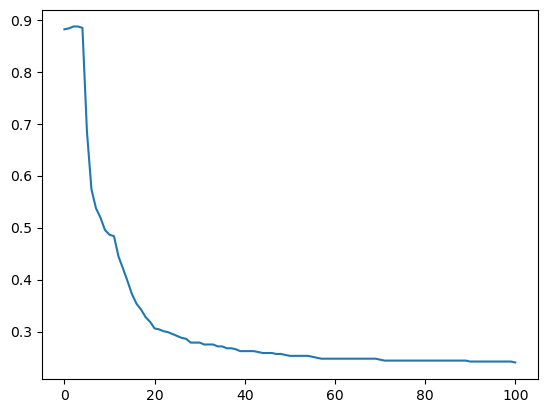

In [20]:
i = list(range(101))
plt.plot(i, couts)

In [21]:
predict = np.round(act_2)
predict

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],

In [22]:
print(accuracy_score(cancer_y_train, predict))

0.7595628415300546


### Tests avec eps=20

In [25]:
## Création du réseau
couche_lineaire_1 = Linear(dim_input, dim_output1)
act_tanh = Tanh()
couche_lineaire_2 = Linear(dim_input, dim_output)
act_sig = Sigmoide()
mse_loss = MSELoss()

# Passe forward initiale
output_1 = couche_lineaire_1.forward(cancer_X_train)
act_1 = act_tanh.forward(output_1)
output_2 = couche_lineaire_2.forward(act_1)
act_2 = act_sig.forward(output_2)

couts = []
couts.append(mse_loss.forward(cancer_y_train, act_2))
nb_iter = 100

for i in range(nb_iter):
    # passe backward
    ## Calcul des deltas
    delta_1 = mse_loss.backward(cancer_y_train, act_2)
    delta_2 = act_sig.backward_delta(output_2, delta_1)
    delta_3 = couche_lineaire_2.backward_delta(act_1, delta_2)
    delta_4 = act_tanh.backward_delta(output_1, delta_3)
    delta_5 = couche_lineaire_1.backward_delta(cancer_X_train, delta_4)
    
    ## MàJ des gradients
    couche_lineaire_2.backward_update_gradient(act_1, delta_2)
    couche_lineaire_1.backward_update_gradient(cancer_X_train, delta_4)

    ## MàJ des paramètres
    couche_lineaire_1.update_parameters(gradient_step=20)
    couche_lineaire_2.update_parameters(gradient_step=20)
    
    #Passe forward
    output_1 = couche_lineaire_1.forward(cancer_X_train)
    act_1 = act_tanh.forward(output_1)
    output_2 = couche_lineaire_2.forward(act_1)
    act_2 = act_sig.forward(output_2)

    couts.append(mse_loss.forward(cancer_y_train, act_2))
    
    
    


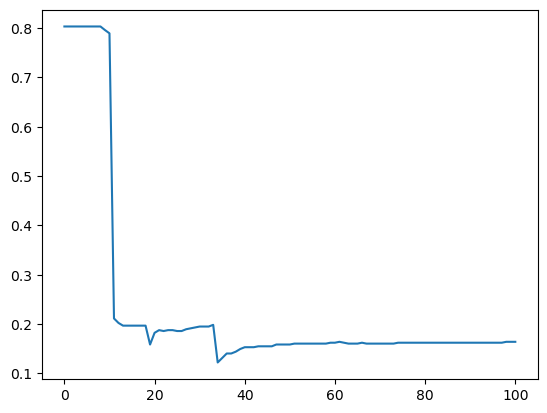

In [26]:
i = list(range(101))
plt.plot(i, couts)

In [27]:
predict = np.round(act_2)

In [28]:
print(accuracy_score(cancer_y_train, predict))

0.8360655737704918


### tests dataset test

In [2]:
from Reseau2Couches import Reseau2Couches

In [7]:
np.random.seed(0)

In [16]:
nn = Reseau2Couches(dim_input=2, dim_hidden=2)
nn.fit(cancer_X_train, cancer_y_train, nb_iter=10, learning_rate=20)
print(nn.accuracy_train)

y_hat = nn.predict(cancer_X_test)
nn.accuracy(cancer_y_test, y_hat)


0.12021857923497267


0.7

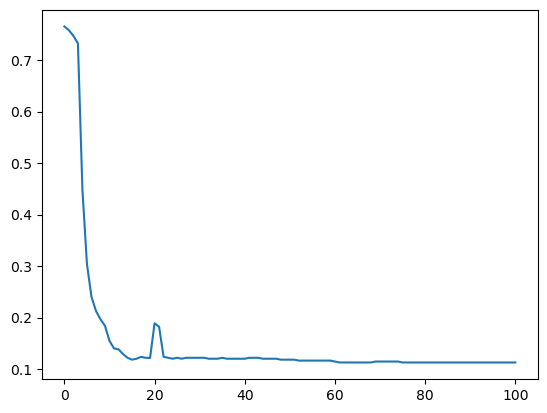

In [7]:
nn.plot_couts()

In [8]:
nn2 = Reseau2Couches(dim_input=2, dim_hidden=2)
nn2.fit(cancer_X_train, cancer_y_train, nb_iter=20, learning_rate=30)
print(nn2.accuracy_train)

y_hat = nn2.predict(cancer_X_test)
nn2.accuracy(cancer_y_test, y_hat)


0.6575591985428051


c:\_TME\Projet-ML\Sigmoide.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
c:\_TME\Projet-ML\Sigmoide.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.3